# Weclome to the Sunday Lab! 

# Lab Structure
- Post the materials on the Github before the Lab


- Review the asynchronous lecture on Wednesday


- Q&A time


- Stay at least 10 minutes 


- Update the notebook after the Lab if needed

# HW4 Comment
- Put all import commands at the beginning of the script


- Comments serve you, not graders

# Matplotlib

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from matplotlib import ticker

In [2]:
tip = sns.load_dataset('tips')
tip.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
tip = tip.sort_values('total_bill', ascending=False)
top_bill = tip.iloc[0:20, :]
top_bill = top_bill.sort_values('total_bill', ascending=True)  
# top_bill['cus_name'] = ['cus' +s tr(item) for item in list(range(1, 21))]
top_bill = top_bill.assign(cus_name = ['cus' + str(item) for item in list(range(1, 21))])
top_bill = top_bill.reset_index(drop=True)
print(top_bill)
print(top_bill.describe())

    total_bill    tip     sex smoker   day    time  size cus_name
0        34.63   3.55    Male    Yes   Sun  Dinner     2     cus1
1        34.65   3.68    Male    Yes   Sun  Dinner     4     cus2
2        34.81   5.20  Female     No   Sun  Dinner     4     cus3
3        34.83   5.17  Female     No  Thur   Lunch     4     cus4
4        35.26   5.00  Female     No   Sun  Dinner     4     cus5
5        35.83   4.67  Female     No   Sat  Dinner     3     cus6
6        38.01   3.00    Male    Yes   Sat  Dinner     4     cus7
7        38.07   4.00    Male     No   Sun  Dinner     3     cus8
8        38.73   3.00    Male    Yes   Sat  Dinner     4     cus9
9        39.42   7.58    Male     No   Sat  Dinner     4    cus10
10       40.17   4.73    Male    Yes   Fri  Dinner     4    cus11
11       40.55   3.00    Male    Yes   Sun  Dinner     2    cus12
12       41.19   5.00    Male     No  Thur   Lunch     5    cus13
13       43.11   5.00  Female    Yes  Thur   Lunch     4    cus14
14       4

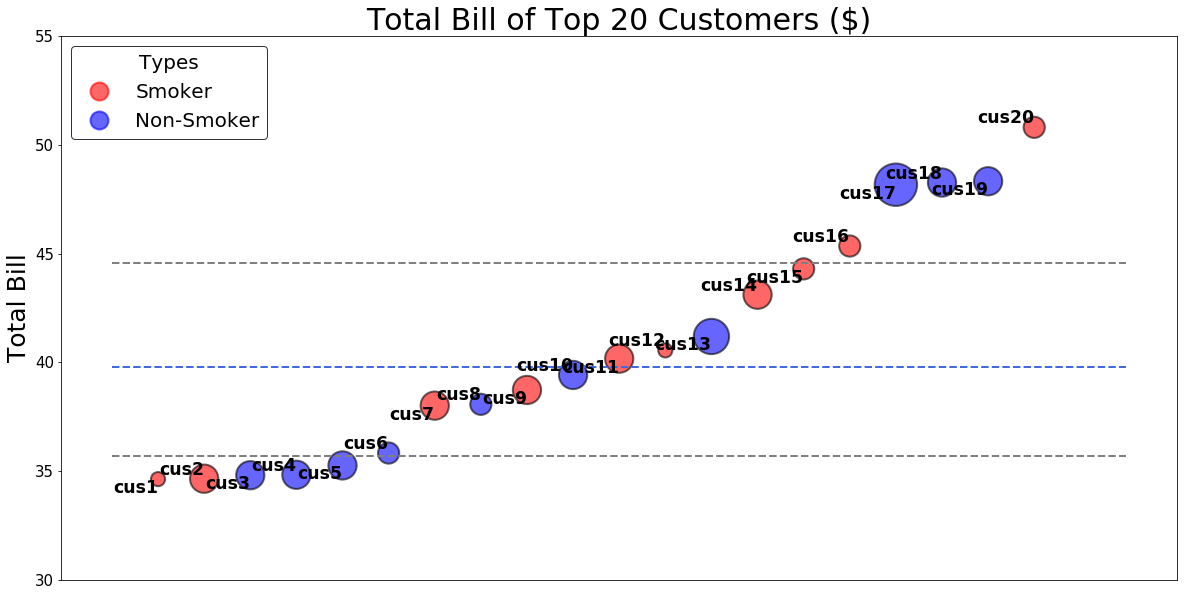

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
scatter = ax.scatter(y=top_bill['total_bill'], 
                     x=top_bill['cus_name'], 
                     # size of each scatter
                     s=top_bill['size']**2*50,
                     # Categorize based on smoker
                     c=top_bill['smoker'].cat.codes, 
                     # Colormap object generated from a list of colors
                     # Cite: https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html
                     cmap=ListedColormap(['r', 'b']), 
                     # Transparency of each scatter
                     alpha=0.6, 
                     # Edge color of scatter
                     edgecolors='black', 
                     # Edge line of scatter
                     linewidth=2)
ax.hlines(y=35.687500, xmin=-1, xmax=21, 
          linewidth=2, color='grey',ls='--')
ax.hlines(y=39.795000, xmin=-1, xmax=21, 
          linewidth=2, color='royalblue',ls='--')
ax.hlines(y=44.562500, xmin=-1, xmax=21, 
          linewidth=2, color='grey',ls='--')
# Remove x ticks
# Cite: https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib
ax.get_xaxis().set_ticks([])
# Cite: https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots
yticks = [30, 35, 40, 45, 50, 55]
ax.set_yticks(yticks)
plt.yticks(fontsize=15)
classes = ['Smoker', 'Non-Smoker']
# Add legends
# Cite: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html
# Def of handles: The original object which is used to generate an appropriate entry in the legend
# Cite: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
ax.legend(handles=scatter.legend_elements()[0], labels=classes, 
          loc='upper left', title_fontsize=20, fontsize=20, 
          title='Types', markerscale=3, edgecolor='black')
# Add labels
# Cite: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
ax.set_ylabel('Total Bill', size=25)
ax.set_title('Total Bill of Top 20 Customers ($)', size=30)
# Align with your code
# plt.ylabel('Total Bill', size=25)
# plt.title('Total Bill of Top 20 Customers', size=30)
# Label each scatter
# Cite: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
for line in range(0, top_bill.shape[0]):
    if (line % 2) == 0:
        ax.text(top_bill['cus_name'][line], top_bill['total_bill'][line], 
                top_bill['cus_name'][line], horizontalalignment='right', va='top', 
                size='xx-large', color='black', weight='semibold')
    else: 
        ax.text(top_bill['cus_name'][line], top_bill['total_bill'][line], 
                top_bill['cus_name'][line], horizontalalignment='right', va='bottom',
                size='xx-large', color='black', weight='semibold')

In [5]:
sk_tip_bill = tip[tip['smoker']=='Yes']
nsk_tip_bill = tip[tip['smoker']=='No']
sk_tip_bill.head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3
182,45.35,3.5,Male,Yes,Sun,Dinner,3
102,44.30,2.5,Female,Yes,Sat,Dinner,3
197,43.11,5.0,Female,Yes,Thur,Lunch,4
184,40.55,3.0,Male,Yes,Sun,Dinner,2


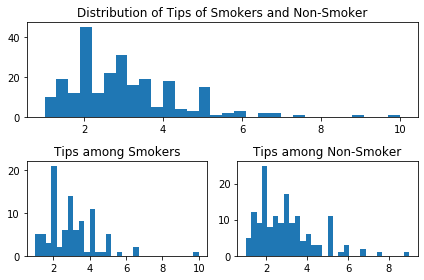

In [6]:
import matplotlib.pyplot as plt                    
fig, axs = plt.subplots(ncols=2, nrows=2)
axs_ez = [item for sub_list in axs for item in sub_list]
# Remove top two plots
for ax in [axs_ez[0], axs_ez[1]]:
    ax.remove()
# Add a long top plot
# https://matplotlib.org/stable/tutorials/intermediate/gridspec.html
gs = axs_ez[0].get_gridspec()
axbig = fig.add_subplot(gs[0, :]) 
# Make subplots fit in to the figure area.
axbig.hist(tip['tip'], label='Smoker', bins=30)
axs_ez[2].hist(sk_tip_bill['tip'], label='Smoker', bins=30)
axs_ez[3].hist(nsk_tip_bill['tip'], label='Non-Smoker', bins=30)
axbig.set_title('Distribution of Tips of Smokers and Non-Smoker')
axs_ez[2].set_title('Tips among Smokers')
axs_ez[3].set_title('Tips among Non-Smoker')
fig.tight_layout()   

Seaborn

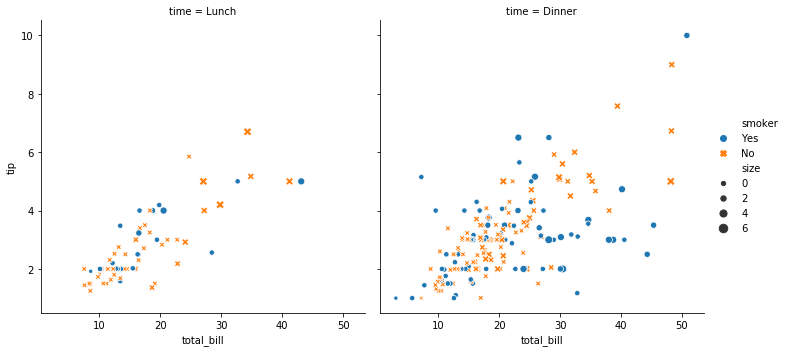

In [7]:
# Cite: https://seaborn.pydata.org/introduction.html
sns.relplot(data=tip, x='total_bill', y='tip', col='time',
            hue='smoker', style='smoker', size='size')